In [164]:
import pandas as pd
column_order = ['Date', 'Bid', 'Ask', 'Opening price', 'High price', 'Low price', 'Closing price', 'Average price', 'Total volume', 'Turnover', 'Trades']
data = pd.read_csv("../data/SHB_A-1999-01-06-2024-02-05.csv", sep=";", decimal=",", skiprows=1, usecols=column_order)

data

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,2024-02-02,112.60,112.70,112.70,113.350,111.550,112.400,112.519,4.351375e+06,4.896353e+08,5539
1,2024-02-01,111.15,111.25,111.30,113.450,111.100,111.350,111.908,5.566891e+06,6.232837e+08,6901
2,2024-01-31,112.55,112.60,114.10,114.300,112.550,112.550,112.857,5.180940e+06,5.847794e+08,5316
3,2024-01-30,113.65,113.75,113.45,114.200,112.800,113.650,113.695,2.873323e+06,3.266947e+08,3750
4,2024-01-29,113.25,113.30,114.50,114.700,113.100,113.300,113.718,3.901108e+06,4.436254e+08,5006
...,...,...,...,...,...,...,...,...,...,...,...
6301,1999-01-13,NaN,NaN,NaN,36.667,34.500,35.611,NaN,3.513832e+06,1.241553e+08,321
6302,1999-01-12,NaN,NaN,NaN,37.667,36.667,36.944,NaN,2.348996e+06,8.721411e+07,256
6303,1999-01-11,NaN,NaN,NaN,39.222,37.555,37.778,NaN,9.686449e+05,3.677745e+07,175
6304,1999-01-08,NaN,NaN,NaN,39.444,38.611,38.889,NaN,1.458489e+06,5.702799e+07,231


DropNA

In [165]:
data = data.iloc[::-1]
data.dropna()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
5201,2003-06-03,44.167,44.333,0.00,44.500,44.00,44.333,44.216,4.120426e+06,1.828195e+08,526
5200,2003-06-04,44.000,44.167,0.00,44.333,43.50,44.167,43.936,9.314253e+06,4.092270e+08,646
5199,2003-06-05,44.500,44.667,0.00,44.833,44.00,44.500,44.433,6.527857e+06,2.900099e+08,641
5198,2003-06-06,44.833,45.000,0.00,45.500,44.50,45.000,45.015,1.008005e+07,4.535637e+08,636
5197,2003-06-10,44.500,44.667,0.00,45.000,44.50,44.500,44.692,5.266661e+06,2.358420e+08,647
...,...,...,...,...,...,...,...,...,...,...,...
4,2024-01-29,113.250,113.300,114.50,114.700,113.10,113.300,113.718,3.901108e+06,4.436254e+08,5006
3,2024-01-30,113.650,113.750,113.45,114.200,112.80,113.650,113.695,2.873323e+06,3.266947e+08,3750
2,2024-01-31,112.550,112.600,114.10,114.300,112.55,112.550,112.857,5.180940e+06,5.847794e+08,5316
1,2024-02-01,111.150,111.250,111.30,113.450,111.10,111.350,111.908,5.566891e+06,6.232837e+08,6901


<Axes: xlabel='Date'>

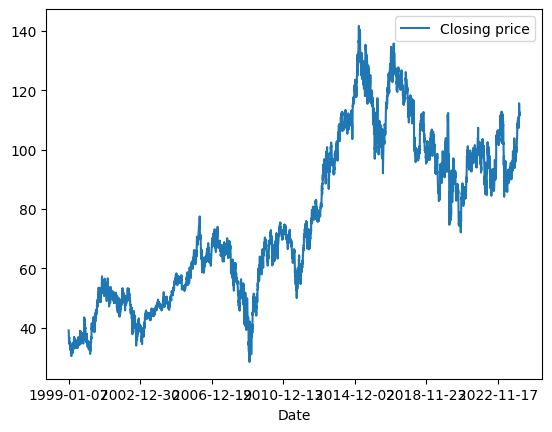

In [166]:
data.plot(y="Closing price", x="Date")

C:\Users\Erik\AppData\Local\Temp\ipykernel_33556\3334581431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Diff"] = data["Closing price"].diff()


<Axes: xlabel='Date'>

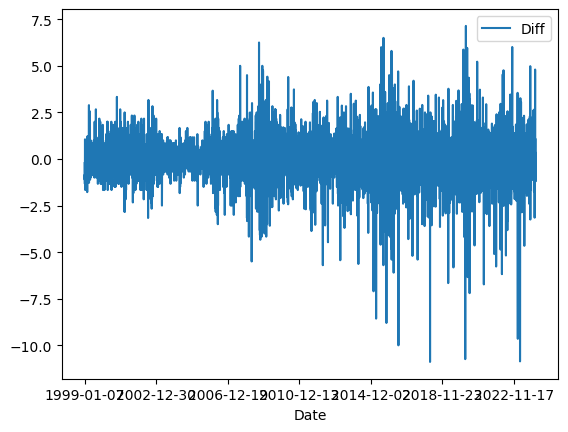

In [167]:
data["Diff"] = data["Closing price"].diff()

data.plot(y="Diff", x="Date")

In [168]:
import numpy as np

FACTOR = 0.0135 # Profit to define target 0.014

SHORT_CHANGE_HORIZON = 5
MID_CHANGE_HORIZON = 20
LONG_CHANGE_HORIZON = 50
FACTOR = 0.014 # Profit to define target 0.0135
# FACTOR = 0

data["Short_day_change"] = (data["Closing price"] - data["Closing price"].shift(SHORT_CHANGE_HORIZON)) / SHORT_CHANGE_HORIZON
data["Mid_day_change"] = (data["Closing price"] - data["Closing price"].shift(MID_CHANGE_HORIZON)) / MID_CHANGE_HORIZON
data["Long_day_change"] = (data["Closing price"] - data["Closing price"].shift(LONG_CHANGE_HORIZON)) / LONG_CHANGE_HORIZON


data["t+1"] = data["Closing price"].shift(-1)
data["t+2"] = data["Closing price"].shift(-2)
data["t+4"] = data["Closing price"].shift(-4)
data["t+5"] = data["Closing price"].shift(-5)
data["t+3"] = data["Closing price"].shift(-3)

conditions = [
    (data["t+1"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+2"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+3"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+4"] > (data["Closing price"] * (1+FACTOR))) |
    (data["t+5"] > (data["Closing price"] * (1+FACTOR)))
]


choice = [1]
data["Target"] = np.select(conditions, choice, 0)

data = data.dropna()

data["Target"].value_counts()

C:\Users\Erik\AppData\Local\Temp\ipykernel_33556\2444992108.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Short_day_change"] = (data["Closing price"] - data["Closing price"].shift(SHORT_CHANGE_HORIZON)) / SHORT_CHANGE_HORIZON
C:\Users\Erik\AppData\Local\Temp\ipykernel_33556\2444992108.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Mid_day_change"] = (data["Closing price"] - data["Closing price"].shift(MID_CHANGE_HORIZON)) / MID_CHANGE_HORIZON
C:\Users\Erik\AppData\Local\Temp\ipykern

Target
0    2729
1    2460
Name: count, dtype: int64

In [169]:
data

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,...,Diff,Short_day_change,Mid_day_change,Long_day_change,t+1,t+2,t+4,t+5,t+3,Target
5201,2003-06-03,44.167,44.333,0.00,44.500,44.00,44.333,44.216,4.120426e+06,1.828195e+08,...,-0.334,0.1666,0.03330,0.05666,44.167,44.500,44.500,44.667,45.000,1
5200,2003-06-04,44.000,44.167,0.00,44.333,43.50,44.167,43.936,9.314253e+06,4.092270e+08,...,-0.166,0.1000,-0.02500,0.05668,44.500,45.000,44.667,44.500,44.500,1
5199,2003-06-05,44.500,44.667,0.00,44.833,44.00,44.500,44.433,6.527857e+06,2.900099e+08,...,0.333,0.0334,0.02500,0.05334,45.000,44.500,44.500,43.833,44.667,0
5198,2003-06-06,44.833,45.000,0.00,45.500,44.50,45.000,45.015,1.008005e+07,4.535637e+08,...,0.500,0.0666,0.09165,0.08000,44.500,44.667,43.833,44.167,44.500,0
5197,2003-06-10,44.500,44.667,0.00,45.000,44.50,44.500,44.692,5.266661e+06,2.358420e+08,...,-0.500,-0.0334,0.03335,0.06666,44.667,44.500,44.167,45.000,43.833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2024-01-22,110.250,110.300,108.60,110.700,108.45,110.100,109.982,5.093649e+06,5.590668e+08,...,2.250,-0.0600,0.09750,0.28600,109.650,110.800,114.400,113.300,115.600,1
8,2024-01-23,109.650,109.700,110.35,110.550,109.15,109.650,109.678,4.554096e+06,4.994752e+08,...,-0.450,0.4800,0.11000,0.27420,110.800,115.600,113.300,113.650,114.400,1
7,2024-01-24,110.900,110.950,110.55,111.300,109.30,110.800,110.468,4.824577e+06,5.330055e+08,...,1.150,0.6500,0.13250,0.29400,115.600,114.400,113.650,112.550,113.300,1
6,2024-01-25,115.400,115.450,110.40,115.600,110.15,115.600,113.894,8.443112e+06,9.618429e+08,...,4.800,1.5400,0.30250,0.37600,114.400,113.300,112.550,111.350,113.650,0


## Split data into training and test
Using time-series so no random split

In [170]:
X = data[["Diff", "Short_day_change"]].values
y = data["Target"].values
TRAIN_RATIO = 0.8
split_ix = int(len(data) * TRAIN_RATIO)

# Split data into training and validation sets
X_train, X_test = X[:split_ix], X[split_ix:]
y_train, y_test = y[:split_ix], y[split_ix:]


## Classifier

Acc:  0.4730250481695568


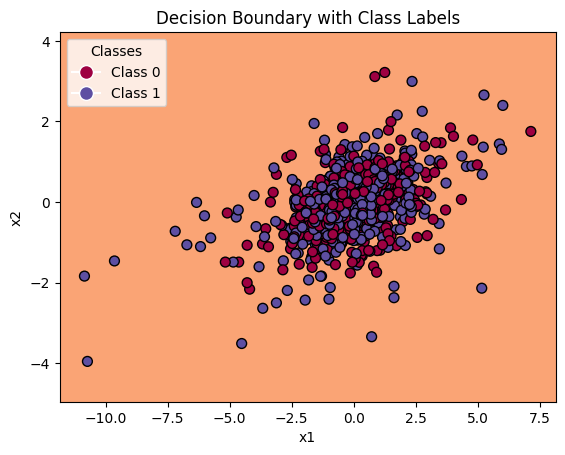

In [171]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

model = svm.SVC(kernel="linear")

model.fit(X_train, y_train)

preds = model.predict(X_test)

acc = accuracy_score(y_test, preds)

print("Acc: ", acc)

# # Plot Decision Boundary
# DecisionBoundaryDisplay.from_estimator(
#         model,
#         X_test,
#         response_method="predict",
#         cmap=plt.cm.Spectral,
#         alpha=0.8,
#         xlabel="x",
#         ylabel="y",
#     )

# plt.scatter(X_test[:, 0], X_test[:, 1], 
#             c=y_test, 
#             s=20, edgecolors="k")
# plt.show()


# Create the decision boundary
DecisionBoundaryDisplay.from_estimator(
    model,
    X_test,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel="x1",
    ylabel="x2",
)

# Create scatter plot
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], 
                      c=y_test, 
                      s=50, 
                      edgecolors="k", 
                      cmap=plt.cm.Spectral)

# Create a legend
# Use unique labels in y_test to create legend labels
unique_labels = np.unique(y_test)
legend_labels = [f'Class {label}' for label in unique_labels]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]

plt.legend(handles, legend_labels, title="Classes")
plt.title("Decision Boundary with Class Labels")
plt.show()